In [ ]:
# Project: Analyzing Children's Home Donations Data | Performing Sql queries in Python

In [ ]:
# Importing libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Let's generate sample data (* The datasets are fictitious and for analysis only)
# Sample data for Donors Table
donors_data = {
    'DonorID': [1, 2, 3, 4, 5],
    'Name': ['Abby Hemsway', 'Rhaenyra Thekaiju', 'Packe Miller', 'Danny Potassium', 'Beverly Chou'],
    'Email': ['abby@example.com', 'rhaenyra@example.com', 'packe@example.com', 'danny@example.com', 'chou@example.com'],
    'JoinDate': ['2024-01-11', '2024-02-27', '2024-03-30', '2024-04-17', '2024-05-01']
}

# Sample data for Products Table
products_data = {
    'ProductID': [101, 102, 103, 104, 105],
    'ProductName': ['Food Supplies', 'Bedding', 'Personal Care Kit', 'Warm Clothes', 'Toys'],
    'Category': ['Essentials', 'Essentials', 'Medical', 'Clothing', 'Recreation'],
    'Price': [100, 250, 300, 100, 50]
}

# Sample data for Donations Table
donations_data = {
    'DonationID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'DonorID': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'ProductID': [101, 102, 103, 104, 105, 101, 102, 103, 104, 105],
    'Quantity': [2500, 1700, 2000, 2300, 2000, 2500, 1700, 2200, 1700, 900],
    'DonationDate': ['2024-01-20', '2024-02-25', '2024-03-15', '2024-04-10', '2024-05-05',
                     '2024-06-01', '2024-06-15', '2024-07-01', '2024-07-10', '2024-07-20']
}

In [ ]:
# Convert dictionaries to DataFrames
donors_df = pd.DataFrame(donors_data)
products_df = pd.DataFrame(products_data)
donations_df = pd.DataFrame(donations_data)

In [ ]:
# View dataframes
print ('Donors dataframe:')
print (donors_df)
print ('Products dataframe:')
print (products_df)
print ('Donations dataframe:')
print (donations_df)

Donors dataframe:
   DonorID               Name                 Email    JoinDate
0        1       Abby Hemsway      abby@example.com  2024-01-11
1        2  Rhaenyra Thekaiju  rhaenyra@example.com  2024-02-27
2        3       Packe Miller     packe@example.com  2024-03-30
3        4    Danny Potassium     danny@example.com  2024-04-17
4        5       Beverly Chou      chou@example.com  2024-05-01
Products dataframe:
   ProductID        ProductName    Category  Price
0        101      Food Supplies  Essentials    100
1        102            Bedding  Essentials    250
2        103  Personal Care Kit     Medical    300
3        104       Warm Clothes    Clothing    100
4        105               Toys  Recreation     50
Donations dataframe:
   DonationID  DonorID  ProductID  Quantity DonationDate
0        1001        1        101      2500   2024-01-20
1        1002        2        102      1700   2024-02-25
2        1003        3        103      2000   2024-03-15
3        1004        4 

In [ ]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

In [ ]:
# Convert Dataframes to Tables in sql
Donors_table = donors_df.to_sql('Donors', conn, if_exists='replace', index=False)
Products_table = products_df.to_sql('Products', conn, if_exists='replace', index=False)
Donations_table = donations_df.to_sql('Donations', conn, if_exists='replace', index=False)

In [ ]:
# Function to execute SQL queries and return the result as a DataFrame
def execute_query(query):
    return pd.read_sql_query(query, conn)

In [ ]:
# Sample query: To test the 'execute_query' function denoted as 'f', let's fetch all the data from the Donor table
query = "SELECT * FROM Donors"
f = execute_query (query)
print (f)

   DonorID               Name                 Email    JoinDate
0        1       Abby Hemsway      abby@example.com  2024-01-11
1        2  Rhaenyra Thekaiju  rhaenyra@example.com  2024-02-27
2        3       Packe Miller     packe@example.com  2024-03-30
3        4    Danny Potassium     danny@example.com  2024-04-17
4        5       Beverly Chou      chou@example.com  2024-05-01


Query 1: Count donations by product category and bar chart
     Category  num_donations
0    Clothing              2
1  Essentials              4
2     Medical              2
3  Recreation              2


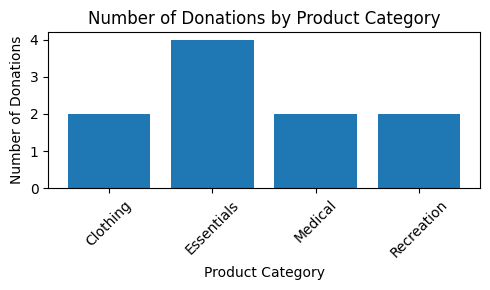

In [ ]:
# The following are new sql queries for analyzing the donations data
# Query 1: Count donations by product category
query1 = """
SELECT p.Category, COUNT(d.DonationID) AS num_donations
FROM donations d
JOIN products p ON d.ProductID = p.ProductID
GROUP BY p.Category
"""
f1 = execute_query(query1)
print("Query 1: Count donations by product category and bar chart")
print(f1)

# Visualization: Bar chart
plt.figure(figsize=(5, 3))
plt.bar(f1['Category'], f1['num_donations'])
plt.xlabel('Product Category')
plt.ylabel('Number of Donations')
plt.title('Number of Donations by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Query 2: Total quantity donated by each donor
query2 = """
SELECT d.Name, SUM(do.Quantity) AS total_quantity_donated
FROM donors d
JOIN donations do ON d.DonorID = do.DonorID
GROUP BY d.Name
"""
f2 = execute_query(query2)
print("\nQuery 2: Total quantity donated by each donor")
print(f2)


Query 2: Total quantity donated by each donor
                Name  total_quantity_donated
0       Abby Hemsway                    5000
1       Beverly Chou                    2900
2    Danny Potassium                    4000
3       Packe Miller                    4200
4  Rhaenyra Thekaiju                    3400


In [ ]:
# Query 3: List of donors who donated each product
query3 = """
SELECT p.ProductName, GROUP_CONCAT(distinct (d.Name)) AS Donors
FROM products p
JOIN donations do ON p.ProductID = do.ProductID
JOIN donors d ON do.DonorID = d.DonorID
GROUP BY p.ProductName
"""
f3 = execute_query(query3)
print("\nQuery 3: List of donors who donated each product")
print(f3)


Query 3: List of donors who donated each product
         ProductName             Donors
0            Bedding  Rhaenyra Thekaiju
1      Food Supplies       Abby Hemsway
2  Personal Care Kit       Packe Miller
3               Toys       Beverly Chou
4       Warm Clothes    Danny Potassium



Query 4: Total quantity donated for each product
         ProductName  total_quantity_donated
0            Bedding                    3400
1      Food Supplies                    5000
2  Personal Care Kit                    4200
3               Toys                    2900
4       Warm Clothes                    4000


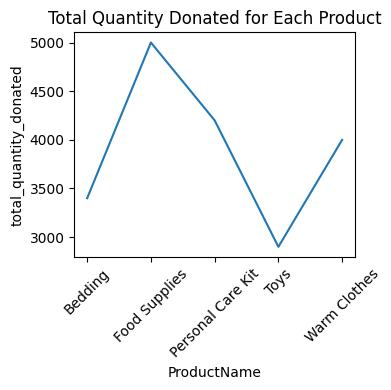

In [ ]:
# Query 4: Total quantity donated for each product and line chart
query4 = """
SELECT p.ProductName, SUM(do.Quantity) AS total_quantity_donated
FROM products p
JOIN donations do ON p.ProductID = do.ProductID
GROUP BY p.ProductName
"""
f4 = execute_query(query4)
print("\nQuery 4: Total quantity donated for each product")
print(f4)

# Line chart of total quantity donated for each product
plt.figure(figsize= (4, 4))
sns.lineplot(x='ProductName', y='total_quantity_donated', data=f4)
plt.xticks(rotation=45)
plt.title('Total Quantity Donated for Each Product')
plt.tight_layout()
plt.show()

In [ ]:
# Query 5: List of products with their category and total quantity donated
query5 = """
SELECT p.ProductName, p.Category, SUM(do.Quantity) AS Total_Quantity_Donated
FROM products p
JOIN donations do ON p.ProductID = do.ProductID
GROUP BY p.ProductName, p.Category
"""
f5 = execute_query(query5)
print("\nQuery 5: List of products with their category and total quantity donated")
print(f5)


Query 5: List of products with their category and total quantity donated
         ProductName    Category  Total_Quantity_Donated
0            Bedding  Essentials                    3400
1      Food Supplies  Essentials                    5000
2  Personal Care Kit     Medical                    4200
3               Toys  Recreation                    2900
4       Warm Clothes    Clothing                    4000


In [ ]:
# Query 6: Total value donated (sum of Price * Quantity for each product)
query6 = """
SELECT p.ProductName, SUM(p.Price * do.Quantity) AS Total_Value_Donated
FROM products p
JOIN donations do ON p.ProductID = do.ProductID
GROUP BY p.ProductName
"""
f6 = execute_query(query6)
print("\nQuery 6: Total value donated (sum of Price * Quantity for each product)")
print(f6)


Query 6: Total value donated (sum of Price * Quantity for each product)
         ProductName  Total_Value_Donated
0            Bedding               850000
1      Food Supplies               500000
2  Personal Care Kit              1260000
3               Toys               145000
4       Warm Clothes               400000


In [ ]:
# Query 7: List of donors who donated more than one time
query7 = """
SELECT d.Name, COUNT(do.DonationID) AS num_donations
FROM donors d
JOIN donations do ON d.DonorID = do.DonorID
GROUP BY d.Name
HAVING num_donations > 1
"""
f7 = execute_query(query7)
print("\nQuery 7: List of donors who donated more than once")
print(f7)


Query 7: List of donors who donated more than once
                Name  num_donations
0       Abby Hemsway              2
1       Beverly Chou              2
2    Danny Potassium              2
3       Packe Miller              2
4  Rhaenyra Thekaiju              2


In [ ]:
# Query 8: List of products in the Essentials category
query8 = """
SELECT ProductName
FROM products
WHERE Category = 'Essentials'
"""
f8 = execute_query(query8)
print("\nQuery 8: List of products in the Essentials category")
print(f8)


Query 8: List of products in the Essentials category
     ProductName
0  Food Supplies
1        Bedding


In [ ]:
# Query 9: Total number of donations made
query9 = """
SELECT COUNT(DonationID) AS total_donations
FROM donations
"""
f9 = execute_query(query9)
print("\nQuery 9: Total number of donations made")
print(f9)


Query 9: Total number of donations made
   total_donations
0               10


In [ ]:
# Query 10: List of donors who joined before 2024-03-01
query10 = """
SELECT Name, JoinDate
FROM donors
WHERE JoinDate < '2024-02-01'
"""
f10 = execute_query(query10)
print("\nQuery 10: List of donors who joined before 2024-02-01")
print(f10)


Query 10: List of donors who joined before 2024-02-01
           Name    JoinDate
0  Abby Hemsway  2024-01-11


In [ ]:
# Query 11: List of products with a price greater than $30
query11 = """
SELECT ProductName, Price
FROM products
WHERE Price > 30
"""
f11 = execute_query(query11)
print("\nQuery 11: List of products with a price greater than $30")
print(f11)


Query 11: List of products with a price greater than $30
         ProductName  Price
0      Food Supplies    100
1            Bedding    250
2  Personal Care Kit    300
3       Warm Clothes    100
4               Toys     50


In [ ]:
# Query 12: List of products not donated in April 2024
query12 = """
SELECT DISTINCT p.ProductName
FROM Products p
WHERE p.ProductID NOT IN (
    SELECT DISTINCT do.ProductID
    FROM Donations do
    WHERE do.DonationDate LIKE '2024-04%'
);
"""
f12 = execute_query(query12)
print("\nQuery 12: List of products not donated in April 2024")
print(f12)


Query 12: List of products not donated in April 2024
         ProductName
0      Food Supplies
1            Bedding
2  Personal Care Kit
3               Toys


In [ ]:
# Query 13: List of products with the highest to lowest prices
query13 = """
SELECT GROUP_CONCAT(p.ProductName) AS Products,
       p.Price AS Highest_to_lowest_price
FROM products p
GROUP BY p.Price
ORDER BY p.Price DESC
"""
f13 = execute_query(query13)
print("\nQuery 13: List of products with the highest and lowest prices")
print(f13)


Query 13: List of products with the highest and lowest prices
                     Products  Highest_to_lowest_price
0           Personal Care Kit                      300
1                     Bedding                      250
2  Food Supplies,Warm Clothes                      100
3                        Toys                       50


In [ ]:
# Query 14: List of donors who have donated the same product more than once
query14 = """
SELECT d.Name, p.ProductName, COUNT(do.DonationID) AS num_donations
FROM donors d
JOIN donations do ON d.DonorID = do.DonorID
JOIN products p ON do.ProductID = p.ProductID
GROUP BY d.Name, p.ProductName
HAVING num_donations > 1
"""
f14 = execute_query(query14)
print("\nQuery 14: List of donors who have donated the same product more than once")
print(f14)


Query 14: List of donors who have donated the same product more than once
                Name        ProductName  num_donations
0       Abby Hemsway      Food Supplies              2
1       Beverly Chou               Toys              2
2    Danny Potassium       Warm Clothes              2
3       Packe Miller  Personal Care Kit              2
4  Rhaenyra Thekaiju            Bedding              2


In [ ]:
# Query 15: Total value donated by each donor, sorted by total value in descending order
query15 = """
SELECT d.Name, SUM(p.Price * do.Quantity) AS total_value_donated
FROM donors d
JOIN donations do ON d.DonorID = do.DonorID
JOIN products p ON do.ProductID = p.ProductID
GROUP BY d.Name
ORDER BY total_value_donated DESC
"""
f15 = execute_query(query15)
print("\nQuery 15: Total value donated by each donor, sorted by total value in descending order")
print(f15)


Query 15: Total value donated by each donor, sorted by total value in descending order
                Name  total_value_donated
0       Packe Miller              1260000
1  Rhaenyra Thekaiju               850000
2       Abby Hemsway               500000
3    Danny Potassium               400000
4       Beverly Chou               145000


In [ ]:
# Query 16: List of products with their total quantity donated, sorted by quantity in descending order
query16 = """
SELECT p.ProductName as Products, SUM(do.Quantity) AS total_quantity_donated
FROM products p
JOIN donations do ON p.ProductID = do.ProductID
GROUP BY p.ProductName
ORDER BY total_quantity_donated DESC
"""
f16 = execute_query(query16)
print("\nQuery 16: List of products with their total quantity donated, sorted by quantity in descending order")
print(f16)


Query 16: List of products with their total quantity donated, sorted by quantity in descending order
            Products  total_quantity_donated
0      Food Supplies                    5000
1  Personal Care Kit                    4200
2       Warm Clothes                    4000
3            Bedding                    3400
4               Toys                    2900


In [ ]:
# Query 17: List of products, their category and price, sorted by category in ascending order
query17 = """
SELECT ProductName, Category, Price
FROM products
ORDER BY Category ASC, Price
"""
f17 = execute_query(query17)
print("\nQuery 17: List of products and their category, sorted by category in ascending order and price in descending order")
print(f17)


Query 17: List of products and their category, sorted by category in ascending order and price in descending order
         ProductName    Category  Price
0       Warm Clothes    Clothing    100
1      Food Supplies  Essentials    100
2            Bedding  Essentials    250
3  Personal Care Kit     Medical    300
4               Toys  Recreation     50



Query 18: List of products with their total quantity donated and average quantity donated, sorted by average quantity in descending order
         ProductName  total_quantity_donated  avg_quantity_donated
0      Food Supplies                    5000                2500.0
1  Personal Care Kit                    4200                2100.0
2       Warm Clothes                    4000                2000.0
3            Bedding                    3400                1700.0
4               Toys                    2900                1450.0


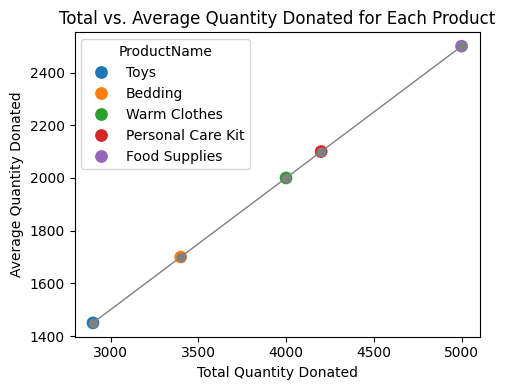

In [ ]:
# Query 18: List of products with their total quantity donated and average quantity donated, sorted by average quantity in descending order
query18 = """
SELECT p.ProductName, SUM(do.Quantity) AS total_quantity_donated, AVG(do.Quantity) AS avg_quantity_donated
FROM products p
JOIN donations do ON p.ProductID = do.ProductID
GROUP BY p.ProductName
ORDER BY avg_quantity_donated DESC
"""
f18 = execute_query(query18)
print("\nQuery 18: List of products with their total quantity donated and average quantity donated, sorted by average quantity in descending order")
print(f18)

# Sort DataFrame by total_quantity_donated for smoother line plot
f18_sorted = f18.sort_values(by='total_quantity_donated')

# Scatter plot of total vs. average quantity donated for each product with a line connecting points
plt.figure(figsize=(5, 4))
sns.scatterplot(x='total_quantity_donated', y='avg_quantity_donated', data=f18_sorted, hue='ProductName', s=100)
plt.plot(f18_sorted['total_quantity_donated'], f18_sorted['avg_quantity_donated'], marker='o', linestyle='-', color='gray', linewidth=1)
plt.title('Total vs. Average Quantity Donated for Each Product')
plt.xlabel('Total Quantity Donated')
plt.ylabel('Average Quantity Donated')
plt.tight_layout()
plt.show()

In [ ]:
# Close the SQLite connection
conn.close()